# Business Problem

The bank want to build a model such that bank can give a variable rate of intrest to some people.
This model will be implemented on bulk but bank done a proof of concept and collected data for
some people. Now using this data we have to build a machine learning model which can help us
to predict the Interest Rate.

Now we are having data for many variables such as Amount Requested,Amount Funded By
Investors,Interest Rate,Loan Length,Loan Purpose,Debt To Income Ratio,Home
Ownership,Monthly Income,Open CREDIT Lines,Revolving CREDIT Balance,Inquiries in the
Last 6 Months,Employment Length.

Now we have to use this information to make prediction on what should be the Interest Rate.
The task now is to predict such a loan rate given the data.
Have you ever thought you get a different interest rate than your friend when you borrow
personal loan.

# Solution Approach:
As we need to predict Interest Rate, which is continuous in nature, Linear Regression can be used for
prediction

## Step 1: Loading the Data

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading a csv file
df = pd.read_csv('loan_data.csv')

In [3]:
#Dimensions of the data
df.shape

(2500, 13)

In [4]:
#First 10 rows of the data
df.head(10)

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174.0,20000,20000.0,0.09,36 months,debt_consolidation,0.15,MORTGAGE,6541.67,14,14272,2,1 year
1,99592.0,19200,19200.0,0.12,36 months,debt_consolidation,0.28,MORTGAGE,4583.33,12,11140,1,2 years
2,80059.0,35000,35000.0,0.22,60 months,debt_consolidation,0.24,MORTGAGE,11500.00,14,21977,1,2 years
3,15825.0,10000,9975.0,0.10,36 months,debt_consolidation,0.14,MORTGAGE,3833.33,10,9346,0,5 years
4,33182.0,12000,12000.0,0.12,36 months,credit_card,0.19,RENT,3195.00,11,14469,0,9 years
5,62403.0,6000,6000.0,0.15,36 months,other,0.20,OWN,4891.67,17,10391,2,3 years
6,48808.0,10000,10000.0,0.08,36 months,debt_consolidation,0.26,RENT,2916.67,10,15957,0,10+ years
7,22090.0,33500,33450.0,0.17,60 months,credit_card,0.15,MORTGAGE,13863.42,12,27874,0,10+ years
8,76404.0,14675,14675.0,0.14,36 months,credit_card,0.27,RENT,3150.00,9,7246,1,8 years
9,15867.0,1000,7000.0,0.07,36 months,credit_card,0.07,RENT,5000.00,8,7612,0,3 years


In [5]:
#Data Types of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2499 non-null   float64
 1   Amount.Requested                2500 non-null   int64  
 2   Amount.Funded.By.Investors      2500 non-null   float64
 3   Interest.Rate                   2500 non-null   float64
 4   Loan.Length                     2499 non-null   object 
 5   Loan.Purpose                    2499 non-null   object 
 6   Debt.To.Income.Ratio            2500 non-null   float64
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2500 non-null   float64
 9   Open.CREDIT.Lines               2500 non-null   int64  
 10  Revolving.CREDIT.Balance        2500 non-null   int64  
 11  Inquiries.in.the.Last.6.Months  2500 non-null   int64  
 12  Employment.Length               24

## Step 2: Data Exploration and Visualization

In [6]:
#Check for a missing values
df.isnull().sum()

ID                                 1
Amount.Requested                   0
Amount.Funded.By.Investors         0
Interest.Rate                      0
Loan.Length                        1
Loan.Purpose                       1
Debt.To.Income.Ratio               0
Home.Ownership                     1
Monthly.Income                     0
Open.CREDIT.Lines                  0
Revolving.CREDIT.Balance           0
Inquiries.in.the.Last.6.Months     0
Employment.Length                 78
dtype: int64

In [7]:
#Drop all the rows which contails missing values
df.dropna(how='any', inplace=True)

In [8]:
#Let's verify if dataframe contains any missing values or not
df.isnull().sum()

ID                                0
Amount.Requested                  0
Amount.Funded.By.Investors        0
Interest.Rate                     0
Loan.Length                       0
Loan.Purpose                      0
Debt.To.Income.Ratio              0
Home.Ownership                    0
Monthly.Income                    0
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
Employment.Length                 0
dtype: int64

In [9]:
#Delete the ID column because it is unnecessary
df.drop('ID', inplace=True, axis=1)

### Frequency table

In [10]:
#Frequency table for Loan.Length variable
df['Loan.Length'].value_counts()

36 months    1881
60 months     536
.               1
Name: Loan.Length, dtype: int64

In [11]:
#Replace categories in Loan.Length   (. -> 36 months)
df['Loan.Length'].replace({'.' : '36 months'}, inplace=True)

In [12]:
#Frequency table for Loan.Purpose variable
df['Loan.Purpose'].value_counts()

debt_consolidation    1266
credit_card            430
other                  188
home_improvement       147
major_purchase         100
small_business          84
car                     50
wedding                 38
moving                  29
medical                 28
house                   20
vacation                20
educational             14
renewable_energy         4
Name: Loan.Purpose, dtype: int64

In [13]:
#Frequency table for Home.Ownership
df['Home.Ownership'].value_counts()

RENT        1114
MORTGAGE    1111
OWN          187
OTHER          5
NONE           1
Name: Home.Ownership, dtype: int64

In [14]:
#Replace category in Home.Ownership   (NONE  -->  RENT)
df['Home.Ownership'].replace({'NONE' : 'RENT'}, inplace=True)

In [15]:
df['Employment.Length'].value_counts()

10+ years    652
1 year       427
2 years      243
3 years      235
5 years      202
4 years      190
6 years      162
7 years      127
8 years      108
9 years       72
Name: Employment.Length, dtype: int64

### Univariate Analysis

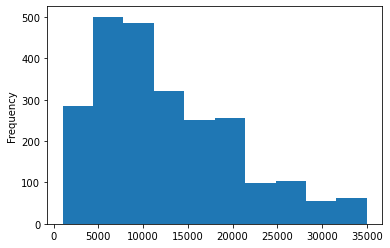

In [16]:
#Histogram of Amount.Requensted variable
df['Amount.Requested'].plot.hist()

The above graph is a right skewed.

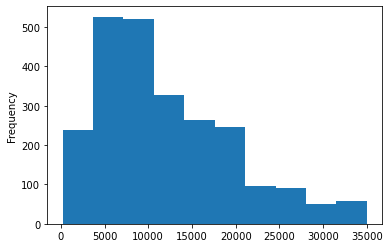

In [17]:
#Histogram of Amount.Funded.By.Investors
df['Amount.Funded.By.Investors'].plot.hist()

This is also a right skewed graph

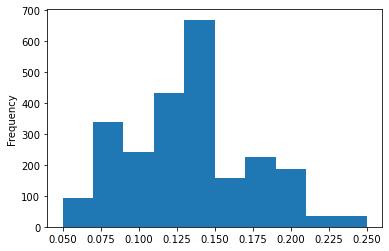

In [18]:
#Histogram of Interest.Rate variable
df['Interest.Rate'].plot.hist()

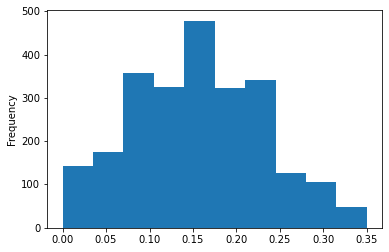

In [19]:
#Histogram 
df['Debt.To.Income.Ratio'].plot.hist()

It has a normal distribution.

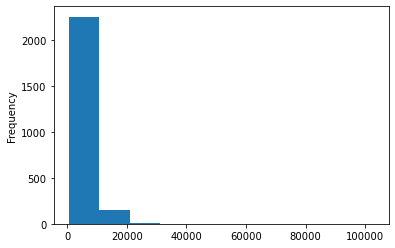

In [20]:
#Histogram of Monthly.Income variable
df['Monthly.Income'].plot.hist()

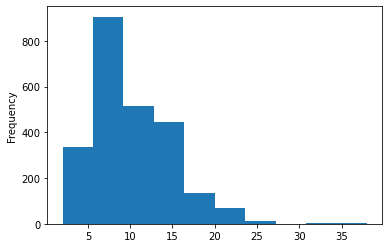

In [21]:
#Histogram of Open.CREDIT.Lines plot
df['Open.CREDIT.Lines'].plot(kind='hist')

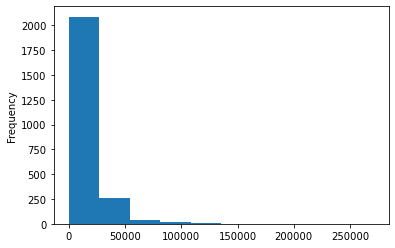

In [22]:
#Histogram of  Revolving.CREDIT.Balance variable
df['Revolving.CREDIT.Balance'].plot.hist()

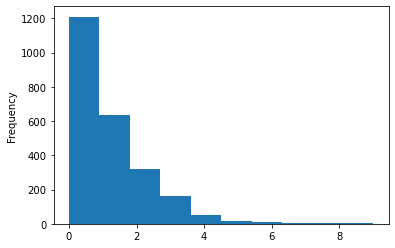

In [23]:
#Histogram of Inquiries.in.the.Last.6.Months variable
df['Inquiries.in.the.Last.6.Months'].plot.hist()

### Bivariate Analysis

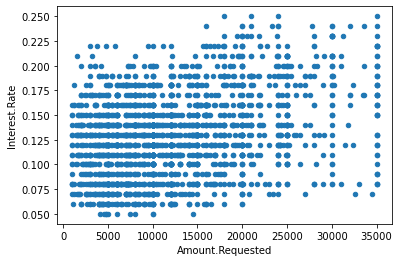

In [24]:
#Scatter plot of Amount.Requested and Interest.Rate
df.plot.scatter('Amount.Requested', 'Interest.Rate')

There is not any visible pattern in above chart

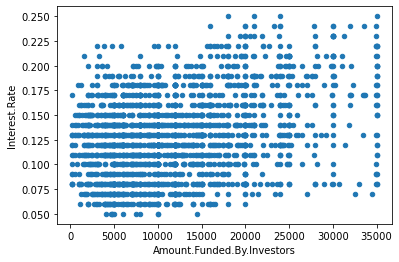

In [25]:
#Scatter plot of Amount.Funded.By.Investors and  Interest.Rate
df.plot.scatter('Amount.Funded.By.Investors', 'Interest.Rate')

We also can't see any pattern in above graph.

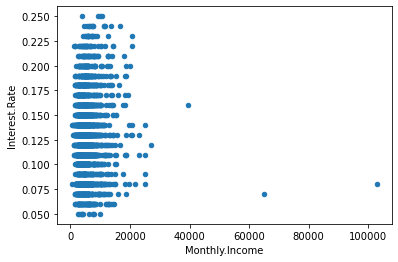

In [26]:
#Scatter plot of Interest.Rate and Monthly.Income
df.plot.scatter('Monthly.Income', 'Interest.Rate')

In [27]:
#Find the correlation between variables
df.corr()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
Amount.Requested,1.000000,0.963513,0.332005,0.086600,0.384409,0.191949,0.299523,-0.035035
Amount.Funded.By.Investors,0.963513,1.000000,0.337188,0.103740,0.365999,0.184912,0.269063,-0.074308
Interest.Rate,0.332005,0.337188,1.000000,0.171265,0.012732,0.092184,0.067669,0.159158
Debt.To.Income.Ratio,0.086600,0.103740,0.171265,1.000000,-0.166004,0.374283,0.186671,0.009953
Monthly.Income,0.384409,0.365999,0.012732,-0.166004,1.000000,0.162137,0.360178,0.032193
Open.CREDIT.Lines,0.191949,0.184912,0.092184,0.374283,0.162137,1.000000,0.287585,0.110564
Revolving.CREDIT.Balance,0.299523,0.269063,0.067669,0.186671,0.360178,0.287585,1.000000,0.012159
Inquiries.in.the.Last.6.Months,-0.035035,-0.074308,0.159158,0.009953,0.032193,0.110564,0.012159,1.000000


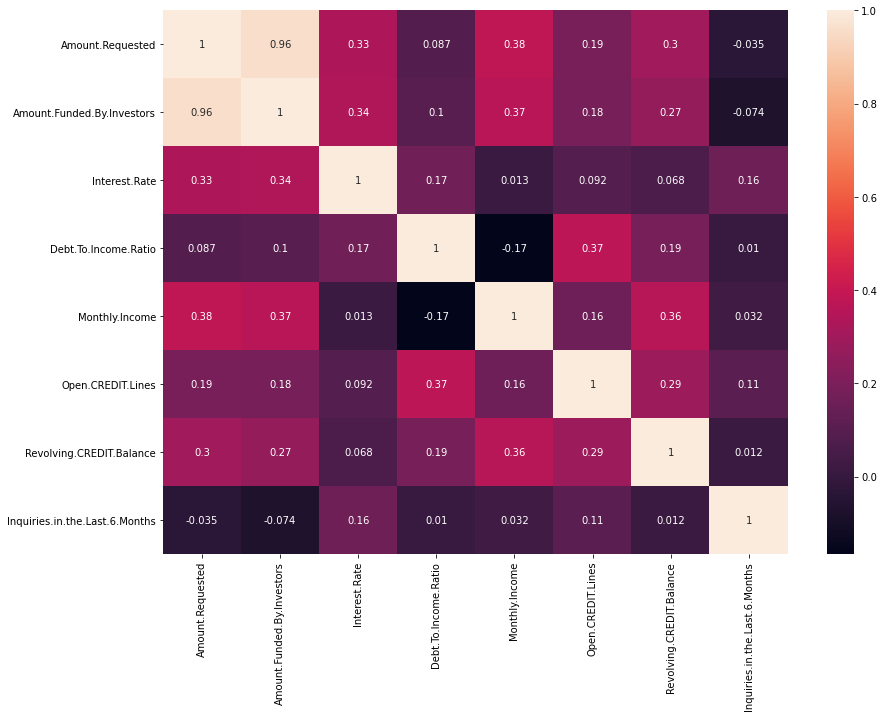

In [28]:
#Let's visualize the relationship through heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True)

### Seperate Numerical and Categorical variables

#### Numerical variables

In [29]:
df_num = df[['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
             'Debt.To.Income.Ratio', 'Monthly.Income', 'Open.CREDIT.Lines',
             'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months']]

#### Categorical variables

In [30]:
df_cat = df[['Loan.Length', 'Loan.Purpose', 'Home.Ownership', 'Employment.Length']]

### Create Dummy variables

In [31]:
dummy_df = pd.get_dummies(df_cat)
dummy_df.head()

,Loan.Length_36 months,Loan.Length_60 months,Loan.Purpose_car,Loan.Purpose_credit_card,Loan.Purpose_debt_consolidation,Loan.Purpose_educational,Loan.Purpose_home_improvement,Loan.Purpose_house,Loan.Purpose_major_purchase,Loan.Purpose_medical,...,Employment.Length_1 year,Employment.Length_10+ years,Employment.Length_2 years,Employment.Length_3 years,Employment.Length_4 years,Employment.Length_5 years,Employment.Length_6 years,Employment.Length_7 years,Employment.Length_8 years,Employment.Length_9 years
0,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Concat Dummy variables and  Numerical variables

In [32]:
df = pd.concat([df_num, dummy_df], axis=1)
df.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Loan.Length_36 months,Loan.Length_60 months,...,Employment.Length_1 year,Employment.Length_10+ years,Employment.Length_2 years,Employment.Length_3 years,Employment.Length_4 years,Employment.Length_5 years,Employment.Length_6 years,Employment.Length_7 years,Employment.Length_8 years,Employment.Length_9 years
0,20000,20000.0,0.09,0.15,6541.67,14,14272,2,1,0,...,1,0,0,0,0,0,0,0,0,0
1,19200,19200.0,0.12,0.28,4583.33,12,11140,1,1,0,...,0,0,1,0,0,0,0,0,0,0
2,35000,35000.0,0.22,0.24,11500.00,14,21977,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,10000,9975.0,0.10,0.14,3833.33,10,9346,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,12000,12000.0,0.12,0.19,3195.00,11,14469,0,1,0,...,0,0,0,0,0,0,0,0,0,1


## Step 3: Split the data intoTrain set and Test set

In [33]:
#Sepereate Independent and Dependent variables
X = df.drop('Interest.Rate', axis=1)
y = df['Interest.Rate']

In [34]:
#Create train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

## Step 4: Implement Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
#Create an instance of LinearRegression
lr = LinearRegression(normalize=True)

In [37]:
#Fit the model to the train set
lr.fit(X_train, y_train)

LinearRegression(normalize=True)

## Step 5: Make Predictions

In [38]:
#Make predictions over a train set
train_pred = lr.predict(X_train)

In [39]:
#Make predictions over a test set
test_pred = lr.predict(X_test)

## Step 6: Evaluate the Model

In [40]:
from sklearn.metrics import r2_score, mean_squared_error

In [41]:
#Calculate R square and Mean Squared Error for train 
print("Train R Square : ", r2_score(y_train, train_pred))
print("Train Mean Squared Error : ", mean_squared_error(y_train, train_pred))

Train R Square :  0.3174418929639684
Train Mean Squared Error :  0.001175591388549083


In [42]:
#Calculate R square and Mean Squared Error for test
print("Test R Square : ", r2_score(y_test, test_pred))
print("Test Mean Squared Error : ", mean_squared_error(y_test, test_pred))

Test R Square :  0.26489999455897495
Test Mean Squared Error :  0.0011914317058794427
